In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv(os.getcwd() + '/archive/AirPollutionSeoul/Measurement_summary.csv')
df

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0
...,...,...,...,...,...,...,...,...,...,...,...
647506,2019-12-31 19:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.028,0.013,0.5,23.0,17.0
647507,2019-12-31 20:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.025,0.015,0.4,25.0,19.0
647508,2019-12-31 21:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.023,0.015,0.4,24.0,17.0
647509,2019-12-31 22:00,125,"59, Gucheonmyeon-ro 42-gil, Gangdong-gu, Seoul...",37.544962,127.136792,0.003,0.040,0.004,0.5,25.0,18.0


In [3]:
df.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [4]:
df["Address"].unique()[-6] # 동작구 측정소 좌표

'6, Sadang-ro 16a-gil, Dongjak-gu, Seoul, Republic of Korea'

In [5]:
Lat = df.groupby("Station code")['Latitude']
Lon = df.groupby("Station code")['Longitude']
lat_numpy = Lat.unique().to_numpy()

In [6]:
# 위도 경도 DataFrame

location = df.groupby('Station code')['PM2.5'].agg([np.mean])
location['Latitude'] = df['Latitude'].unique()
location['Longitude'] = df['Longitude'].unique()
location.head()

,mean,Latitude,Longitude
Station code,,,
101,22.850454,37.572016,127.005008
102,22.867169,37.564263,126.974676
103,23.670437,37.540033,127.004850
104,24.890639,37.609823,126.934848
105,22.845346,37.593742,126.949679


In [7]:
import folium
from folium.plugins import MarkerCluster

# PM10에 따른 color 변화
def color_select(x):
    if x >= 30:
        return 'red'
    elif x >= 25:
        return 'yellow'
    else:
        return 'blue'

# Map
seoul = folium.Map(location=[37.4971850, 126.927595], zoom_start=14) # 플레이데이터 캠퍼스 좌표 기준

# Circle
for i in range(len(location)):
    # 관측소
    folium.Circle(location=[location.iloc[i,1], location.iloc[i,2]], radius = location.iloc[i, 0]*40, color=color_select(location.iloc[i,0]),fill_color='#ffffgg').add_to(seoul)
    
# Marker / Sejong Univ.
folium.Marker([37.4971850, 126.927595], icon=folium.Icon(popup='아지트', color='red', icon='glyphicon glyphicon-home')).add_to(seoul)
seoul

In [8]:
df_summary = pd.read_csv(os.getcwd() + '/archive/AirPollutionSeoul/Measurement_summary.csv')
df_summary.head()

,Measurement date,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01 00:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2017-01-01 01:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2017-01-01 02:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2017-01-01 03:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2017-01-01 04:00,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [9]:
df_date = df_summary['Measurement date'].str.split(expand=True)
df_date.head()

,0,1
0,2017-01-01,00:00
1,2017-01-01,01:00
2,2017-01-01,02:00
3,2017-01-01,03:00
4,2017-01-01,04:00


In [10]:
df_summary['date'] = df_date[0]
df_summary['time'] = df_date[1]
df_summary = df_summary.drop(['Measurement date'], axis=1)
df_summary.head()

,Station code,Address,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,date,time
0,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2017-01-01,00:00
1,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2017-01-01,01:00
2,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2017-01-01,02:00
3,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2017-01-01,03:00
4,101,"19, Jong-ro 35ga-gil, Jongno-gu, Seoul, Republ...",37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2017-01-01,04:00


In [11]:
df_0 = df_summary.groupby(['date'], as_index=False).agg({'SO2':'mean', 'NO2':'mean', 'O3':'mean', 'CO':'mean', 'PM10':'mean', 'PM2.5':'mean'})
df_0.head()

,date,SO2,NO2,O3,CO,PM10,PM2.5
0,2017-01-01,0.003627,0.044765,0.002478,0.981833,77.201667,56.773333
1,2017-01-02,0.002707,0.035960,0.013127,0.891333,109.243333,77.838333
2,2017-01-03,0.000602,0.037017,0.008223,0.753833,78.546667,51.533333
3,2017-01-04,0.004122,0.048813,0.006918,0.878500,54.966667,34.533333
4,2017-01-05,0.003122,0.033892,0.009725,0.656333,36.246667,22.168333


In [12]:
# 피어슨 상관계수 계산
df_air = df_0.corr()
df_air

C:\Users\tjk\AppData\Local\Temp\ipykernel_9476\1345021395.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_air = df_0.corr()


,SO2,NO2,O3,CO,PM10,PM2.5
SO2,1.000000,0.861667,0.844693,0.234264,0.151687,0.125017
NO2,0.861667,1.000000,0.650407,0.573334,0.362489,0.381048
O3,0.844693,0.650407,1.000000,-0.048180,0.106887,0.060999
CO,0.234264,0.573334,-0.048180,1.000000,0.642527,0.751510
PM10,0.151687,0.362489,0.106887,0.642527,1.000000,0.807851
PM2.5,0.125017,0.381048,0.060999,0.751510,0.807851,1.000000


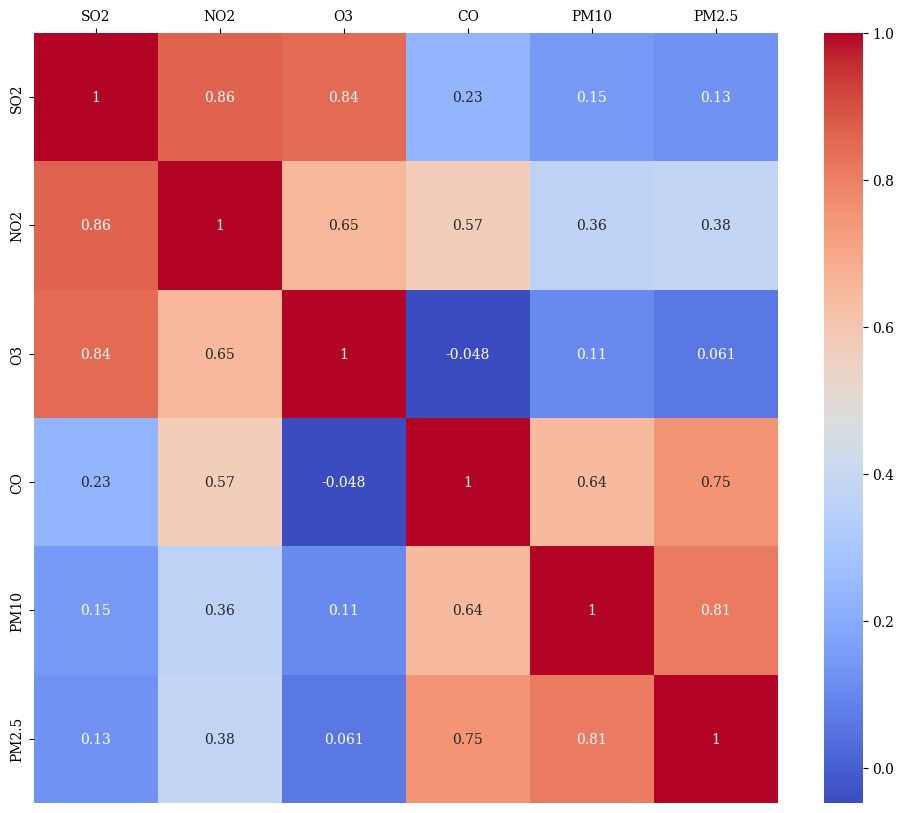

In [47]:
# 상관계수 히트맵
plt.figure(figsize=(12, 10))
ax = sns.heatmap(df_air,
                 annot=True, 
                 cmap='coolwarm')
ax.xaxis.tick_top()

[]

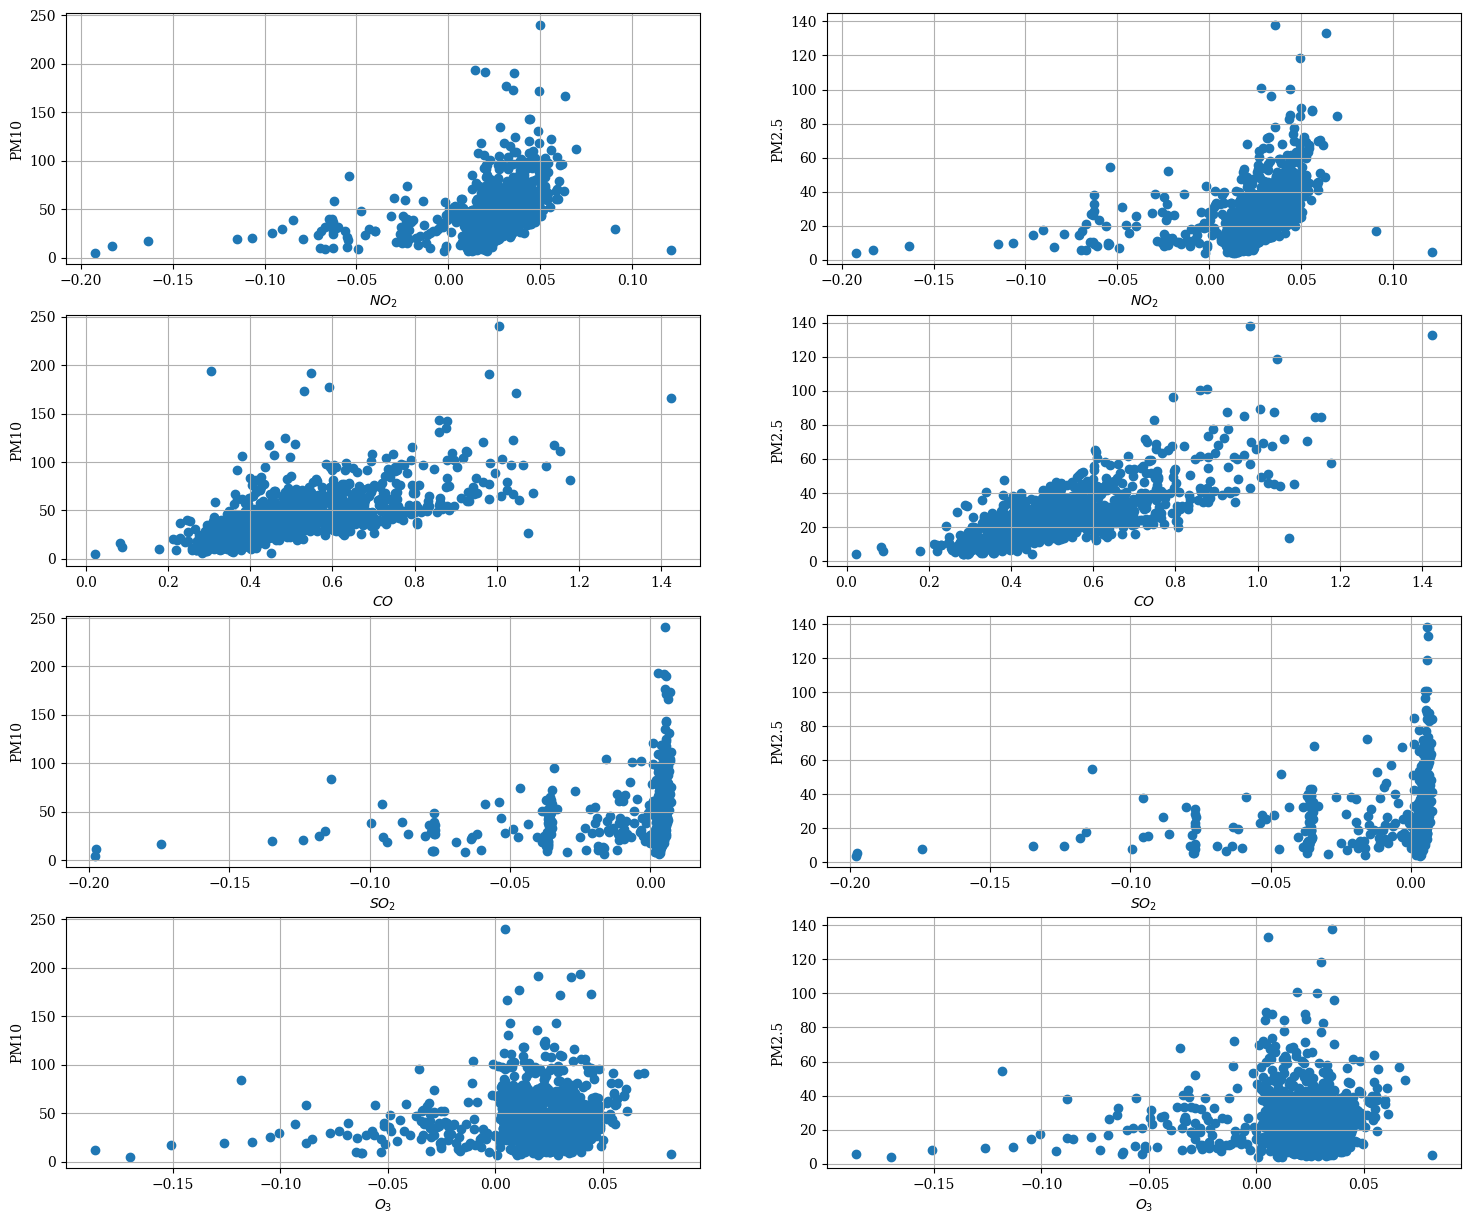

In [46]:
plt.rcParams['font.family'] = 'serif'
f, ax = plt.subplots(4, 2, figsize=(18,15))
rows = ["NO2", "CO", "SO2", "O3"]
cols = ["PM10", "PM2.5"]
rows_label = [r"$NO_2$", r"$CO$", r"$SO_2$", r"$O_3$"]
for i in range(4):
    for j in range(2):
        ax[i, j].scatter(x=rows[i], y= cols[j], data=df_0)
        ax[i, j].set_xlabel(rows_label[i])
        ax[i, j].set_ylabel(cols[j])
        ax[i, j].grid()
plt.plot()